
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 4
-----

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

set2_cols = sns.color_palette("Set2")

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [3]:
sys.path.append(str(root_dir))
import scripts.utils as ut

-----
##### Load & prepare data 

In [7]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [8]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 70), (577, 70))

In [9]:
thr_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5', 'SBS288H5']
thr_nhm_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5']
cos_plat_sbs = ['SBS31', 'SBS35']
cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
all_plat_sbs = ['SBS31', 'SBS35', 'SBS288L5']
all_plat_sigs = ['SBS31', 'SBS35', 'SBS288L5', 'DBS5', 'DBS78H2']

cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
plat_sigs = ['SBS31', 'SBS35', 'DBS5', 'DBS78H2', 'SBS288L5']
ncos_plat_sigs = ['DBS78H2', 'SBS288L5', 'DBS2', 'DBS6', 'ID3']
ncos1_plat_sigs = ['DBS78H2', 'SBS288L5', 'ID3']
ncos2_plat_sigs = ['DBS2', 'DBS6']
plat_enr_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']
plat_enr_thr_nonID = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6']
plat_enr_sbs = ['SBS35', 'SBS31', 'SBS288L5']
plat_enr_dbs = ['DBS78H2', 'DBS5', 'DBS2', 'DBS6']
plat_enr_id = ['ID3']


cos_plat_sbs = kzm611_sigs[['SBS31', 'SBS35']].copy()
cos_plat_all = kzm611_sigs[['SBS31', 'SBS35', 'DBS5']].copy()
all_plat_sigs = kzm611_sigs[plat_enr_thr_sigs].copy()
all_plat_sbs = kzm611_sigs[plat_enr_sbs].copy()
all_plat_dbs = kzm611_sigs[plat_enr_dbs].copy()
all_plat_id = kzm611_sigs[plat_enr_id].copy()

In [10]:
ncos_df = kzm611_sigs[ncos_plat_sigs].copy()
ncos_df['Total'] = ncos_df.sum(axis=1)

In [11]:
kzm_plat_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_plats_days_dose.txt'), sep='\t')
kzm_plat_df.head(2)

,Sample_id,Metastatic,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin
0,KiCS0002_321321,Y,KiCS0002,GCT,858,500.0,4200.0,0,Y,Y,N
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,400.0,0.0,0,Y,N,N


In [12]:
kzm_plat_df.shape

(141, 11)

In [13]:
kzm_plat_df['SBS'] = [kzm611_md.loc[x, 'SBS'] for x in kzm_plat_df.Sample_id]

scaler = MinMaxScaler()
kzm_plat_df.Cisplatin_dose = scaler.fit_transform(kzm_plat_df.Cisplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Carboplatin_dose = scaler.fit_transform(kzm_plat_df.Carboplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Oxaliplatin_dose = scaler.fit_transform(kzm_plat_df.Oxaliplatin_dose.values.reshape(-1,1)).flatten()

kzm_plat_df['Size'] = ((kzm_plat_df.Cisplatin_dose+kzm_plat_df.Carboplatin_dose+kzm_plat_df.Oxaliplatin_dose)/2) * 2000
#kzm_plat_df['Size'] = 500
kzm_plat_df['Days_log'] = np.log10(kzm_plat_df.Days_from+0.00000000001)
kzm_plat_df['SBS_log'] = np.log10(kzm_plat_df.SBS+0.00000000001)

kzm_plat_df.shape

(141, 15)

In [15]:
all_plat_sigs_df = kzm_plat_df.copy()

all_plat_sigs_df['Platin_sig'] = ['Y' if x in all_plat_sigs.loc[(all_plat_sigs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_sbs'] = ['Y' if x in all_plat_sbs.loc[(all_plat_sbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_dbs'] = ['Y' if x in all_plat_dbs.loc[(all_plat_dbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_id'] = ['Y' if x in all_plat_id.loc[(all_plat_id > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]


all_plat_sigs_df.rename(columns={'Type': 'Tumor'}, inplace=True)
all_plat_sigs_df['Total_drugs'] = all_plat_sigs_df.Cisplatin + all_plat_sigs_df.Carboplatin + all_plat_sigs_df.Oxaliplatin

all_plat_sigs_df['cos_total'] = [all_plat_sigs.loc[x, cos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['nonCos_total'] = [all_plat_sigs.loc[x, ncos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]

all_plat_sigs_df.tail(2)

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
139,IID_H156418_T01_01_WG01,N,IID_H156418_T01,NBL,657,0.0,0.0,0.0,N,Y,...,0.0,2.817565,3.162564,Y,Y,N,N,NYN,262.0,255.0
140,IID_H158493_T01_01_WG01,N,IID_H158493_T01,OST,120,0.0,0.0,0.0,Y,N,...,0.0,2.079181,3.702172,Y,Y,Y,N,YNN,0.0,1258.0


In [16]:
all_plat_md = all_plat_sigs_df.copy().set_index('Sample_id')
all_plat_md['Thre_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_md.index]
all_plat_md.to_csv(os.path.join(root_dir, 'source_data/KiCS_plat_state.tsv'), sep='\t')

In [17]:
all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].head()

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
0,KiCS0002_321321,Y,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,...,834.776335,2.933487,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,...,158.730159,3.062206,3.584557,N,N,N,N,YNN,0.0,0.0
2,KiCS0008_289185,Y,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,...,542.986425,2.789581,4.235124,Y,N,Y,N,NNY,110.0,47.0
3,KiCS0010_270645,Y,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,...,47.619048,0.477121,3.830011,N,N,N,N,YNN,0.0,0.0
4,KiCS0010_270646,N,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,...,95.238095,1.875061,2.399674,N,N,N,N,YNN,0.0,0.0


-----------
## Panel a

In [18]:
## Load therapy data at class and individual drug levels
class_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_classes_NY.txt'), sep='\t', index_col=0)
drugs_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_individuals_counts.txt'), sep='\t', index_col=0)

drugs_df = drugs_df.apply(lambda x: ['Y' if y > 0 else 'N' for y in x])
drugs_df = drugs_df.drop([x for x in drugs_df.columns if 'Y' not in drugs_df[x].tolist()], axis=1)

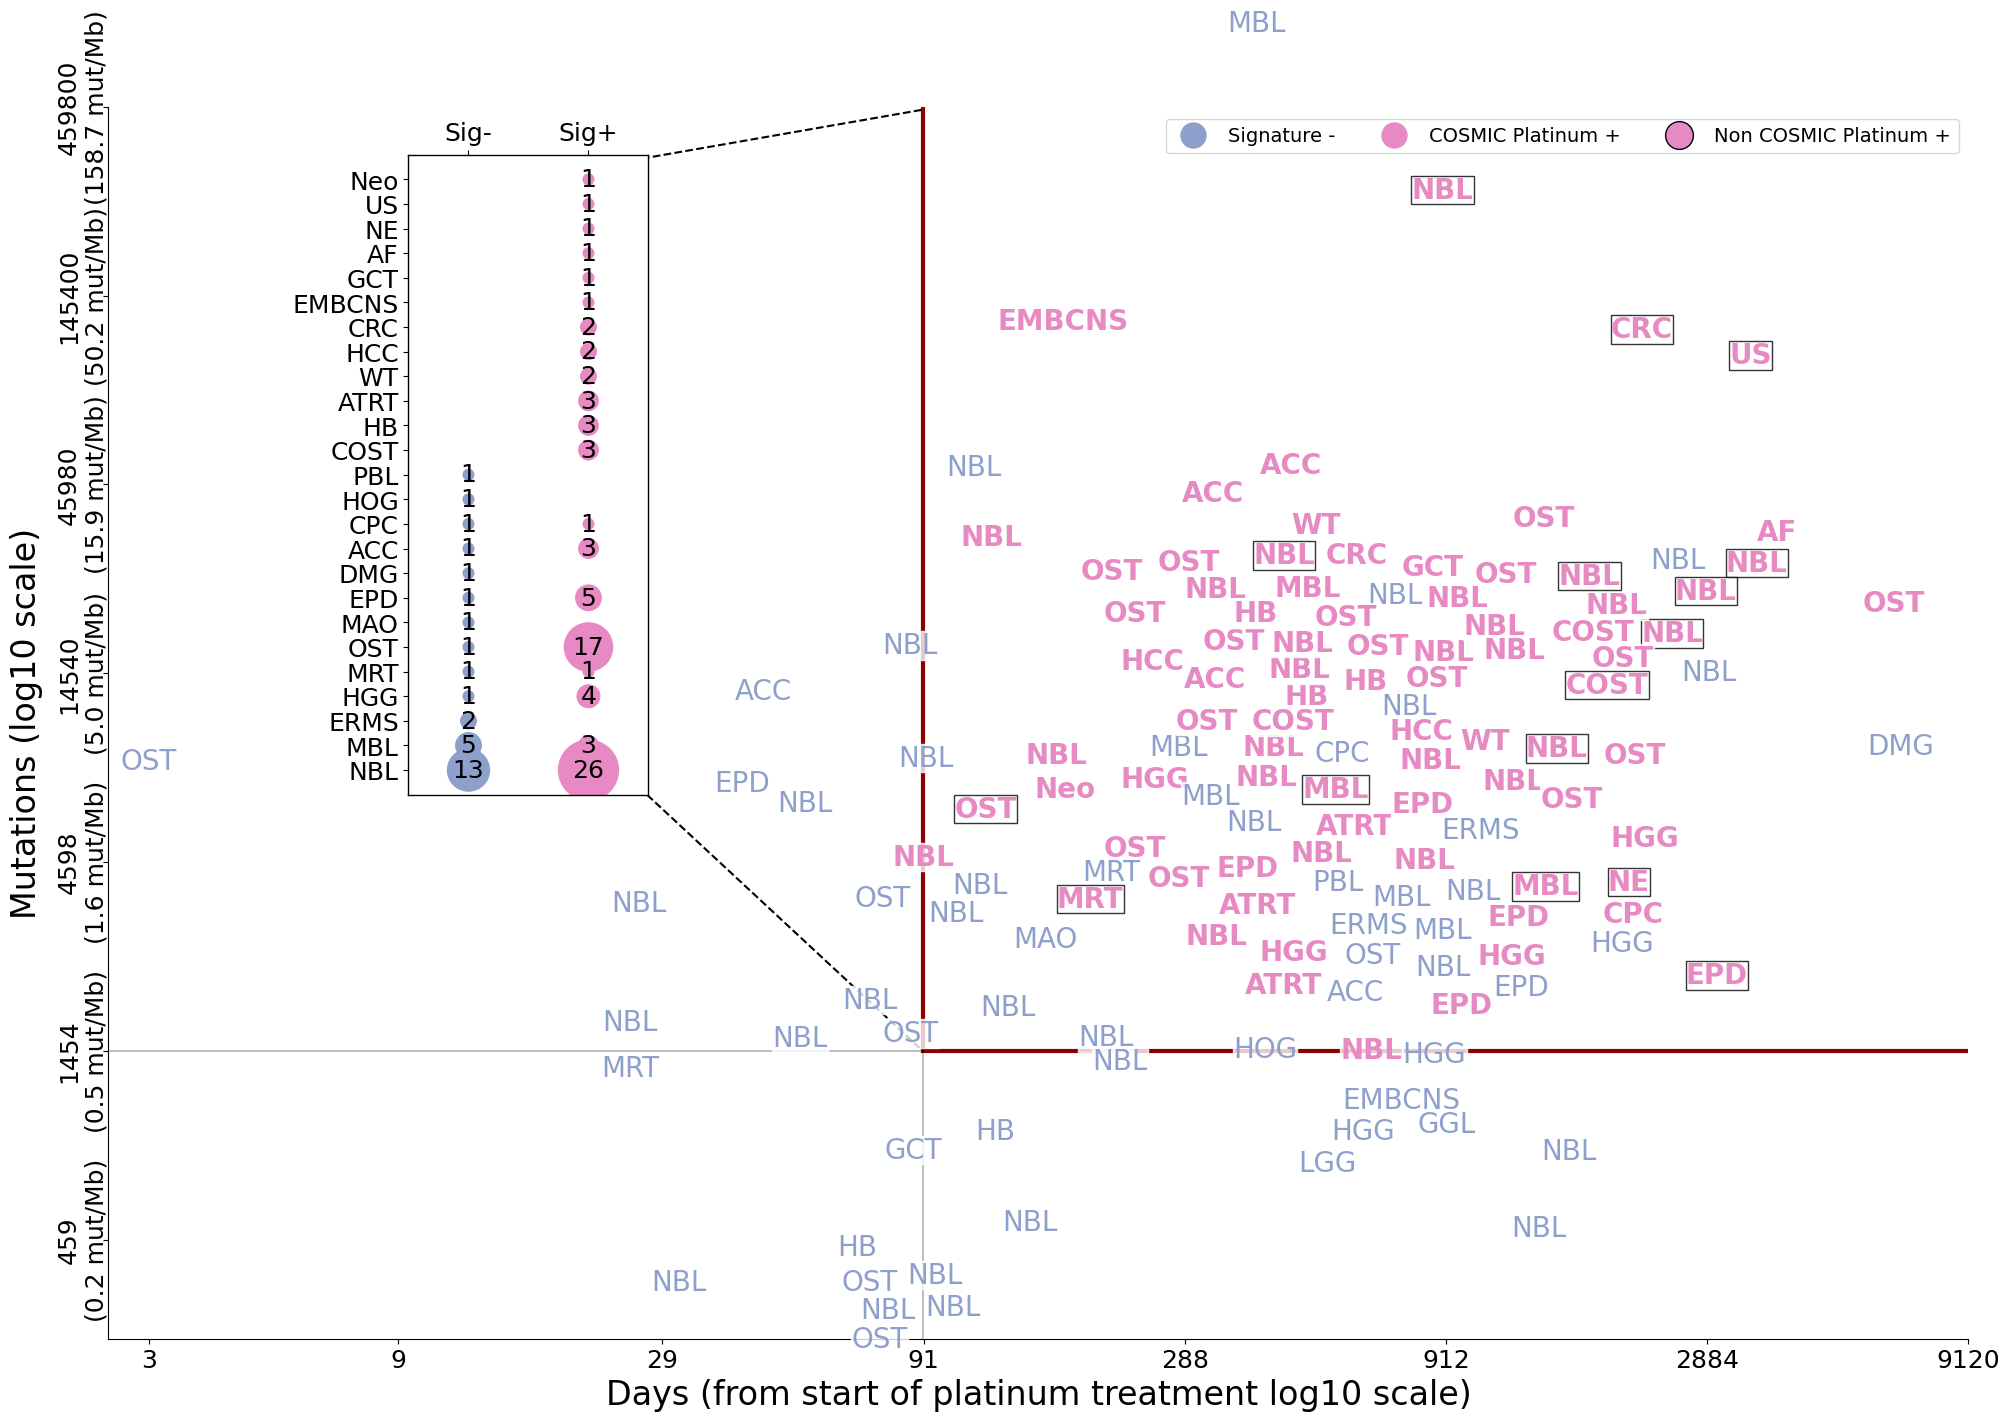

In [20]:
pcols = []

plat_df2plot = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
plat_df2plot['color'] = [set2_cols[2] if x=='N' else set2_cols[3] for x in plat_df2plot.Platin_sig]
if len(plat_df2plot[plat_df2plot.Size == 0]) > 0:
    nonzero_mean = plat_df2plot[plat_df2plot.Size > 0].Size.mean()
    plat_df2plot.Size = [x if x>0 else nonzero_mean for x in plat_df2plot.Size]

plat_df2plot.Days_log = np.round(plat_df2plot.Days_log, 4)
plat_df2plot.SBS_log = np.round(plat_df2plot.SBS_log, 4)

#plat_df2plot['Tumor'] = [plat_df2plot.Tumor.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9128 else plat_df2plot.Tumor.iloc[x]+'Target' for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_log.iloc[x] for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_log.iloc[x] for x in range(plat_df2plot.shape[0])]

# NBL 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.0682 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.9823 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8921 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.4035 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2348 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0531 else plat_df2plot.SBS_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9345 else plat_df2plot.SBS_jitter.iloc[x]+0.025 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6857 else plat_df2plot.SBS_jitter.iloc[x]+0.15 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6803 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5211 else plat_df2plot.SBS_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9345 else plat_df2plot.SBS_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9191 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.3228 else plat_df2plot.Days_jitter.iloc[x]+0.07 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0212 else plat_df2plot.Days_jitter.iloc[x]+0.07 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2022 else plat_df2plot.SBS_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2022 else plat_df2plot.Days_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 4.1838 else plat_df2plot.Days_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6355 else plat_df2plot.Days_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6902 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]


# HB 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8325 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5955 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6928 else plat_df2plot.SBS_jitter.iloc[x]+0.014 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8567 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8567 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]


# OST 3.1614
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8865 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8865 else plat_df2plot.Days_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4048 else plat_df2plot.SBS_jitter.iloc[x]-0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4048 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.3208 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0903 else plat_df2plot.Days_jitter.iloc[x]+0.11 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0245 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0245 else plat_df2plot.Days_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7679 else plat_df2plot.SBS_jitter.iloc[x]+0.07 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8102 else plat_df2plot.SBS_jitter.iloc[x]+0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5539 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8189 else plat_df2plot.SBS_jitter.iloc[x]-0.08 for x in range(plat_df2plot.shape[0])]

# MBL 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8751 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]


# HGG 3.2962
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2962 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8014 else plat_df2plot.SBS_jitter.iloc[x]-0.09 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6684 else plat_df2plot.SBS_jitter.iloc[x]-0.09 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.1614 else plat_df2plot.Days_jitter.iloc[x]+0.18 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4425 else plat_df2plot.SBS_jitter.iloc[x]-0.02 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4425 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]

# EPD 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0542 else plat_df2plot.SBS_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0542 else plat_df2plot.Days_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5798 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

# ACC 2.7875
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7875 else plat_df2plot.SBS_jitter.iloc[x]-0.12 for x in range(plat_df2plot.shape[0])]

# COST 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2804 else plat_df2plot.SBS_jitter.iloc[x]+0.02 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2804 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]

# WT 2.9143
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7110 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9143 else plat_df2plot.SBS_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9143 else plat_df2plot.Days_jitter.iloc[x]+0.12 for x in range(plat_df2plot.shape[0])]

# HCC 
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4683 else plat_df2plot.Days_jitter.iloc[x]-0.07 for x in range(plat_df2plot.shape[0])]

# AF 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.5942 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]

# NE 3.2799
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2799 else plat_df2plot.SBS_jitter.iloc[x]+0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2799 else plat_df2plot.Days_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]

# GGL 2.8609
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8609 else plat_df2plot.SBS_jitter.iloc[x]-0.13 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8609 else plat_df2plot.Days_jitter.iloc[x]+0.1 for x in range(plat_df2plot.shape[0])]

# GCT 2.9335
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9335 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]

# MRT 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.SBS_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]

# CRC 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7896 else plat_df2plot.SBS_jitter.iloc[x]+0.04 for x in range(plat_df2plot.shape[0])]

# ATRT  
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.4850 else plat_df2plot.SBS_jitter.iloc[x]-0.15 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.4850 else plat_df2plot.Days_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.5491 else plat_df2plot.Days_jitter.iloc[x]-0.15 for x in range(plat_df2plot.shape[0])]


# MRT 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.SBS_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.Days_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]

# ERMS 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8116 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

# PBL 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8531 else plat_df2plot.SBS_jitter.iloc[x]-0.07 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8531 else plat_df2plot.Days_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [x+0.1 if x>3.9 else x for x in plat_df2plot['SBS_jitter']]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6665 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6031 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6031 else plat_df2plot.Days_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8893 else plat_df2plot.SBS_jitter.iloc[x]+0.1 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0039 else plat_df2plot.SBS_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0039 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0622 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9345 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]


plat_df2plot['SBS_jitter'] = [x+0.1 if x>3.7 else x for x in plat_df2plot['SBS_jitter']]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.7271 else plat_df2plot.SBS_jitter.iloc[x]-0.07 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9122 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9154 else plat_df2plot.SBS_jitter.iloc[x]-0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 4.0634 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6425 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6425 else plat_df2plot.SBS_jitter.iloc[x]-0.14 for x in range(plat_df2plot.shape[0])]


plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6160 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.1614 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0253 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9191 else plat_df2plot.SBS_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9890 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.5694 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.9128 else plat_df2plot.Days_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.9345 else plat_df2plot.Days_jitter.iloc[x]+0.02 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.8102 else plat_df2plot.Days_jitter.iloc[x]+0.02 for x in range(plat_df2plot.shape[0])]

#2.

for r in range(plat_df2plot.shape[0]):
    if plat_df2plot.cos_total.iloc[r] > 0:
        pcols.append('white')
    elif plat_df2plot.nonCos_total.iloc[r] > 0:
        pcols.append('black')
    else:
        #pcols.append(set2_cols[2])
        pcols.append('white')


# === MAIN FIGURE ===
f, ax = plt.subplots(figsize=(24,16))


# Calculate local density and adjust font size accordingly
from scipy.spatial import distance_matrix

coords = plat_df2plot[['Days_jitter', 'SBS_jitter']].values
dist_matrix = distance_matrix(coords, coords)
nearby_counts = (dist_matrix < 0.2).sum(axis=1)  # Count nearby points

for i, row in plat_df2plot.iterrows():
    # Smaller font in crowded areas
    fontsize = max(12, 16 - nearby_counts[i])
    
    ax.text(
        row['Days_jitter'], row['SBS_jitter'], row['Tumor'],
        color=row['color'],
        fontsize=20,
        ha='center', va='center',
        weight='bold' if row['Platin_sig'] == 'Y' else 'normal',
        bbox=dict(facecolor='white', edgecolor=pcols[i], pad=0.3, alpha=0.8)
    )


# === LEGEND ===
custom_lines = [
    Line2D([0], [0], color='white', marker='o', mfc=set2_cols[2], ms=20),
    Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], ms=20),
    Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], mec='black', ms=20)
]
leg_labels = ['Signature -', 'COSMIC Platinum +', 'Non COSMIC Platinum +']
plt.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1,.998), ncol = 3, fontsize=14)

# === AXIS TICKS ===
genome_size = 2897.310462
ax.set_xticks([0.477, 0.9542, 1.46, 1.96, 2.46, 2.96, 3.46, 3.96])
#ax.set_xticks(np.arange(0.477, 4.16, 0.05))
#ax.set_xticklabels(np.arange(0.477, 4.16, 0.05), rotation=90)
ax.set_xticklabels([3, 9, 29, 91, 288, 912, 2884, 9120], fontsize=18)
ax.set_yticks([2.6625, 3.1625, 3.6625, 4.1625, 4.6625, 5.1625, 5.6625])
#ax.set_xticks(np.arange(2, 6, 0.2))
ax.set_yticklabels([f"459\n({np.round(459/genome_size, 1)} mut/Mb)", f"1454\n({np.round(1454/genome_size, 1)} mut/Mb)", f"4598\n({np.round(4598/genome_size, 1)} mut/Mb)",
                    f"14540\n({np.round(14540/genome_size, 1)} mut/Mb)", f"45980\n({np.round(45980/genome_size, 1)} mut/Mb)", f"145400\n({np.round(145400/genome_size, 1)} mut/Mb)",
                    f"459800\n({np.round(459800/genome_size, 1)} mut/Mb)"], rotation=90, ha='center', va='center', fontsize=18)


'''ax.set_xticks(np.arange(0.477, 4.16, 0.05))
ax.set_xticklabels(np.round(np.arange(0.477, 4.16, 0.05), 4), rotation=90)
ax.set_yticks(np.arange(2, 6, 0.2))
ax.set_yticklabels(np.round(np.arange(2, 6, 0.2),4))'''

ax.tick_params(axis='y', which='major', pad=15)
# === LIMITS AND GUIDE LINES ===
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_day = plat_df2plot[plat_df2plot.Platin_sig=='Y'].Days_log.min()
min_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.min()
max_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.max()

plt.axvline(min_day, color="gray", alpha=0.5)
plt.axhline(min_sbs, color="gray", alpha=0.5)

'''rect = patches.Rectangle((min_day, min_sbs), x_max-min_day, max_sbs,
                         linewidth=2.5, edgecolor='darkred', facecolor='none')
ax.add_patch(rect)'''

plt.axvline(min_day, 0.235, 1, color="darkred", linewidth=3)
plt.axhline(min_sbs, 0.438, 1, color="darkred", linewidth=3)

ax.set_ylabel('Mutations (log10 scale)', labelpad=10, fontsize=24)
plt.xlabel('Days (from start of platinum treatment log10 scale)', fontsize=24)

# === FORCE Y-AXIS TO START AT 2.3 ===
ax.set_xlim(left=0.4, right=x_max)
ax.set_ylim(bottom=2.4, top=y_max)

ax.spines[['top', 'right']].set_visible(False)

# === INSET PLOT ===
type_sig_mlt = ut.get_type_numbers(
    plat_df2plot[(plat_df2plot.SBS_log>=min_sbs) & (plat_df2plot.Days_log>=min_day)].copy()
)

x1, y1 = [1.4, 1.96], [3.88, 3.16]
x2, y2 = [1.4, 1.96], [5.52, 5.655]
plt.plot(x1, y1, x2, y2, color='black', linestyle='--')

# Keep your inset as-is
ax2 = f.add_axes([0.25, 0.45, 0.1, 0.4])
ax2.scatter(
    type_sig_mlt.Sig, type_sig_mlt.Tumor,
    edgecolors='k', s=type_sig_mlt.Count*75, c=type_sig_mlt.Color,
    zorder=2, linewidths=0
)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
ax2.xaxis.tick_top()
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([-0.5, 1.5])
plt.ylim([-1, type_sig_mlt.shape[0]/2])

for i, txt in enumerate(type_sig_mlt.Count):
    if pd.notna(txt) and txt != 0:
        ax2.annotate(int(np.round(txt)), (type_sig_mlt.Sig[i], type_sig_mlt.Tumor[i]),
                     fontsize=18, ha='center', va='center')



#plt.savefig(os.path.join(fig_out, 'Fig_4a_rev.pdf'), bbox_inches="tight")

-----------
## Panel b

In [44]:
KZM_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_dates.tsv'), sep='\t', index_col=0)

In [45]:
gen_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'DBS4', 'ID8', 'SBS288L3', 'DBS9', 'ID3', 'SBS288L4', 'SBS288L2']
plat_enr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']

In [46]:
kzm611_gen_thr_sigs = kzm611_sigs[gen_thr_sigs].copy()
kzm611_gen_thr_sigs.head(3)

,SBS35,DBS78H2,SBS31,SBS288L5,DBS5,DBS2,DBS6,DBS4,ID8,SBS288L3,DBS9,ID3,SBS288L4,SBS288L2
I-H-108298-T1-1-D1-1,1868,0.0,0,0,60.0,80.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108317-T1-1-D1-1,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108319-T1-1-D1-1,2833,57.0,0,0,0.0,25.0,0.0,0.0,0,0,0.0,0,0,0


In [47]:
## Subset post-therapy samples
kzm611_gen_thr_sigs_v2 = kzm611_gen_thr_sigs.loc[[x for x in kzm611_gen_thr_sigs.index if x  in kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()]].copy()
kzm611_gen_thr_sigs_v2.shape

(349, 14)

In [48]:
KZM_dates_gen_thr = KZM_dates[KZM_dates.Days_from > 0].copy()
KZM_dates_gen_thr['Months'] = [np.ceil(x/30) for x in KZM_dates_gen_thr.Days_from]
KZM_dates_gen_thr['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in KZM_dates_gen_thr.index]
KZM_dates_gen_thr.head()

,Sample_date,Days_from,Months,sigsYN
KiCS0002_321321,2015-05-15,858.0,29.0,Y
KiCS0006_274243,2015-05-24,1198.0,40.0,N
KiCS0007_302948,2015-02-20,15.0,1.0,N
KiCS0008_289185,2016-07-06,762.0,26.0,Y
KiCS0010_270645,2014-04-01,3.0,1.0,N


In [49]:
gen_months_dict = {}
for mo in KZM_dates_gen_thr.Months.unique():
    subd = KZM_dates_gen_thr[KZM_dates_gen_thr.Months<=mo]
    
    if 'Y' in subd.sigsYN.tolist():
        gen_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        gen_months_dict[mo] = 0
months_gen_sigs_df = pd.DataFrame.from_dict(gen_months_dict, orient='index')
months_gen_sigs_df.columns = ['Patients_Percent']
months_gen_sigs_df['Months'] = months_gen_sigs_df.index.tolist()
months_gen_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.235294,29.0
40.0,0.265060,40.0


In [50]:
all_plat_sigs_df_v2 = all_plat_sigs_df.copy()
all_plat_sigs_df_v2['Months'] = [np.ceil(x/30) for x in all_plat_sigs_df_v2.Days_from]
plat_months_dict = {}
for mo in all_plat_sigs_df_v2.Months.unique():
    subd = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        plat_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        plat_months_dict[mo] = 0
months_plat_sigs_df = pd.DataFrame.from_dict(plat_months_dict, orient='index')
months_plat_sigs_df.columns = ['Patients_Percent']
months_plat_sigs_df['Months'] = months_plat_sigs_df.index.tolist()
months_plat_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.504950,29.0
39.0,0.513514,39.0


In [51]:
all_plat_sigs_df_v2['Thr_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_sigs_df_v2.Sample_id]
all_plat_sigs_df_v2.head(2)

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,Months,Thr_State
0,KiCS0002_321321,Y,KiCS0002,GCT,858,0.198413,0.636364,0.0,Y,Y,...,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0,29.0,Advanced-Treated
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,0.158730,0.000000,0.0,Y,N,...,3.584557,N,N,N,N,YNN,0.0,0.0,39.0,Advanced-Treated


In [52]:
all_plat_sigs_df_v2.Thr_State.value_counts()

Thr_State
Advanced-Treated    103
Primary-Treated      38
Name: count, dtype: int64

In [53]:
all_plat_sigs_PT = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Thr_State=='Primary-Treated'].copy()
pt_months_dict = {}
for mo in all_plat_sigs_PT.Months.unique():
    subd = all_plat_sigs_PT[all_plat_sigs_PT.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        pt_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        pt_months_dict[mo] = 0
months_pt_sigs_df = pd.DataFrame.from_dict(pt_months_dict, orient='index')
months_pt_sigs_df.columns = ['Patients_Percent']
months_pt_sigs_df['Months'] = months_pt_sigs_df.index.tolist()
months_pt_sigs_df.head(2)

,Patients_Percent,Months
3.0,0.000000,3.0
4.0,0.052632,4.0


In [54]:
all_plat_sigs_AT = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Thr_State=='Advanced-Treated'].copy()
at_months_dict = {}
for mo in all_plat_sigs_AT.Months.unique():
    subd = all_plat_sigs_AT[all_plat_sigs_AT.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        at_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        at_months_dict[mo] = 0
months_at_sigs_df = pd.DataFrame.from_dict(at_months_dict, orient='index')
months_at_sigs_df.columns = ['Patients_Percent']
months_at_sigs_df['Months'] = months_at_sigs_df.index.tolist()
months_at_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.621212,29.0
39.0,0.618421,39.0


In [55]:
all_plat_sigs_AT.shape, all_plat_sigs_PT.shape

((103, 24), (38, 24))

In [56]:
all_plat_sigs_MTN = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Metastatic=='N'].copy()
mtn_months_dict = {}
for mo in all_plat_sigs_MTN.Months.unique():
    subd = all_plat_sigs_MTN[all_plat_sigs_MTN.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        mtn_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        mtn_months_dict[mo] = 0
months_mtn_sigs_df = pd.DataFrame.from_dict(mtn_months_dict, orient='index')
months_mtn_sigs_df.columns = ['Patients_Percent']
months_mtn_sigs_df['Months'] = months_mtn_sigs_df.index.tolist()
months_mtn_sigs_df.head(2)

,Patients_Percent,Months
3.0,0.000,3.0
10.0,0.125,10.0


In [57]:
all_plat_sigs_MTP = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Metastatic=='Y'].copy()
mtp_months_dict = {}
for mo in all_plat_sigs_MTP.Months.unique():
    subd = all_plat_sigs_MTP[all_plat_sigs_MTP.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        mtp_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        mtp_months_dict[mo] = 0
months_mtp_sigs_df = pd.DataFrame.from_dict(mtp_months_dict, orient='index')
months_mtp_sigs_df.columns = ['Patients_Percent']
months_mtp_sigs_df['Months'] = months_mtp_sigs_df.index.tolist()
months_mtp_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.689655,29.0
39.0,0.694444,39.0


In [58]:
all_plat_sigs_MTP.shape, all_plat_sigs_MTN.shape

((47, 24), (37, 24))

In [59]:
antimets_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_antimetabolites.tsv'), sep='\t', index_col=0)
anthra_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_anthracyclines.tsv'), sep='\t', index_col=0)

anthra_dates = anthra_dates[anthra_dates.Days_from > 0].copy()
anthra_dates['Months'] = [np.ceil(x/30) for x in anthra_dates.Days_from]

antimets_dates = antimets_dates[antimets_dates.Days_from > 0].copy()
antimets_dates['Months'] = [np.ceil(x/30) for x in antimets_dates.Days_from]
anthra_dates.shape, antimets_dates.shape

((82, 7), (31, 7))

In [60]:
anthra_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in anthra_dates.index]
antimets_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in antimets_dates.index]

In [61]:
anthra_months_dict = {}
for mo in anthra_dates.Months.unique():
    subd = anthra_dates[anthra_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        anthra_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        anthra_months_dict[mo] = 0
anthra_months_sigs = pd.DataFrame.from_dict(anthra_months_dict, orient='index')
anthra_months_sigs.columns = ['Patients_Percent']
anthra_months_sigs['Months'] = anthra_months_sigs.index.tolist()
anthra_months_sigs.head(2)

,Patients_Percent,Months
38.0,0.4375,38.0
1.0,0.0000,1.0


In [62]:
antimets_months_dict = {}
for mo in antimets_dates.Months.unique():
    subd = antimets_dates[antimets_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        antimets_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        antimets_months_dict[mo] = 0
antimets_months_sigs = pd.DataFrame.from_dict(antimets_months_dict, orient='index')
antimets_months_sigs.columns = ['Patients_Percent']
antimets_months_sigs['Months'] = antimets_months_sigs.index.tolist()
antimets_months_sigs.head(2)

,Patients_Percent,Months
2.0,0.000000,2.0
10.0,0.214286,10.0


In [65]:
months_gen_sigs_df.Patients_Percent = months_gen_sigs_df.Patients_Percent * 100
months_plat_sigs_df.Patients_Percent = months_plat_sigs_df.Patients_Percent * 100

In [66]:
anthra_months_sigs.Patients_Percent = anthra_months_sigs.Patients_Percent * 100
antimets_months_sigs.Patients_Percent = antimets_months_sigs.Patients_Percent * 100


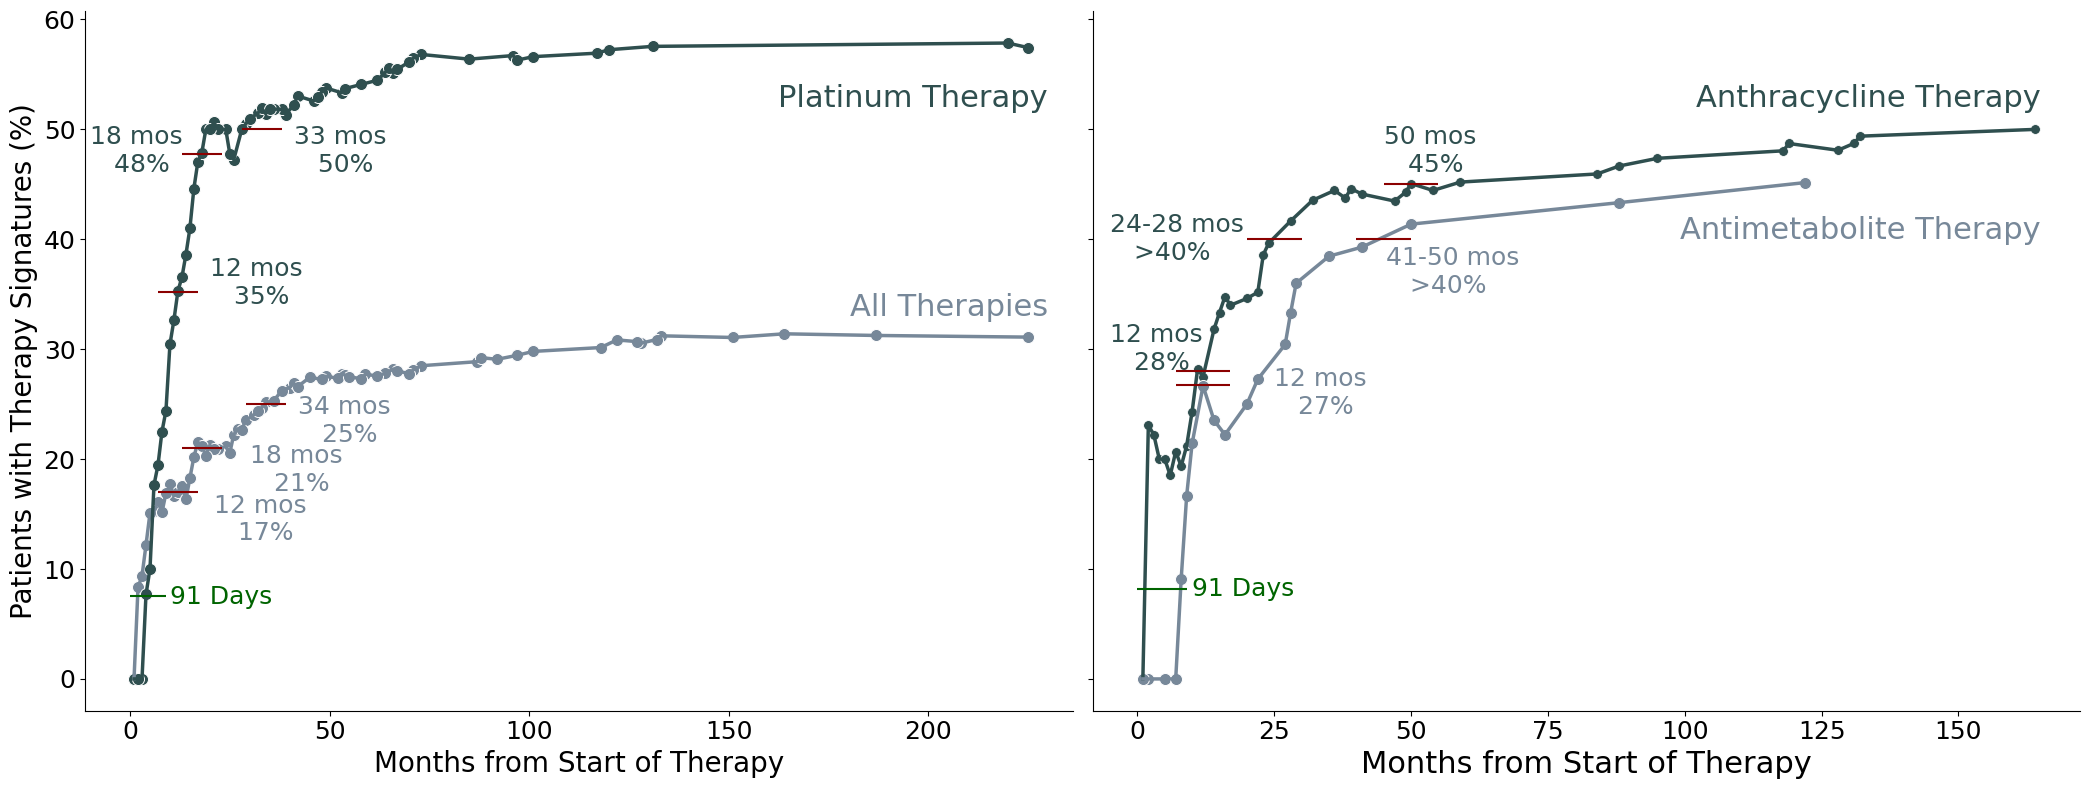

In [67]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, axes = plt.subplots(1,2, figsize=(21, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

ax1 = sns.lineplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', s=75)



ax2 = sns.lineplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

axes[0].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[0].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
axes[0].spines[['right', 'top']].set_visible(False)

axes[0].hlines(17, color='darkred', xmin=7, xmax=17)
axes[0].hlines(21, color='darkred', xmin=13, xmax=23)
axes[0].hlines(25, color='darkred', xmin=29, xmax=39)
#axes[0].hlines(0.27, color='darkred', xmin=40, xmax=50)
ax1.text(21, 14.5, '12 mos\n   17%', va='center', color='lightslategrey', fontsize=18)
ax1.text(30, 19, '18 mos\n   21%', va='center', color='lightslategrey', fontsize=18)
ax1.text(42, 23.5, '34 mos\n   25%', va='center', color='lightslategrey', fontsize=18)
#ax1.text(35, 0.29, '45 mos\n   27%', va='center', color='lightslategrey', fontsize=18)

axes[0].hlines(35.2, color='darkred', xmin=7, xmax=17)
axes[0].hlines(47.8, color='darkred', xmin=13, xmax=23)
axes[0].hlines(50, color='darkred', xmin=28, xmax=38)
axes[0].text(20, 36, '12 mos\n   35%', va='center', color='darkslategrey', fontsize=18)
axes[0].text(-10, 48, '18 mos\n   48%', va='center', color='darkslategrey', fontsize=18)
axes[0].text(41, 48, '33 mos\n   50%', va='center', color='darkslategrey', fontsize=18)



axes[0].text(230, 52, 'Platinum Therapy', ha='right', color='darkslategrey', fontsize=22)
axes[0].text(230, 33, 'All Therapies', ha='right', color='lightslategrey', fontsize=22)


ax3 = sns.lineplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', linewidth=2.5)
ax3 = sns.scatterplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', s=50)

ax4 = sns.lineplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', linewidth=2.5)
ax4 = sns.scatterplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', s=75)

axes[1].set_xlabel('Months from Start of Therapy', fontsize=22)
axes[1].set_ylabel('Patients with Therapy Signatures (%)', fontsize=22)
axes[1].set_title('', fontsize=18)

axes[1].hlines(28, color='darkred', xmin=7, xmax=17)
axes[1].hlines(40, color='darkred', xmin=20, xmax=30)
axes[1].hlines(45, color='darkred', xmin=45, xmax=55)
axes[1].text(-5, 30, '12 mos\n   28%', va='center', color='darkslategrey', fontsize=18)
axes[1].text(-5, 40, '24-28 mos\n   >40%', va='center', color='darkslategrey', fontsize=18)
axes[1].text(45, 48, '50 mos\n   45%', va='center', color='darkslategrey', fontsize=18)

axes[1].hlines(26.7, color='darkred', xmin=7, xmax=17)
axes[1].hlines(40, color='darkred', xmin=40, xmax=50)
axes[1].text(25, 26, '12 mos\n   27%', va='center', color='lightslategrey', fontsize=18)
axes[1].text(45.5, 37, '41-50 mos\n   >40%', va='center', color='lightslategrey', fontsize=18)

axes[1].text(165, 52, 'Anthracycline Therapy', ha='right', color='darkslategrey', fontsize=22)
axes[1].text(165, 40, 'Antimetabolite Therapy', ha='right', color='lightslategrey', fontsize=22)

axes[1].spines[['right', 'top']].set_visible(False)

axes[0].hlines(7.5, color='darkgreen', xmin=0, xmax=9)
axes[0].text(10, 7.5, '91 Days', va='center', color='darkgreen', fontsize=18)
axes[1].hlines(8.2, color='darkgreen', xmin=0, xmax=9)
axes[1].text(10, 8.2, '91 Days', va='center', color='darkgreen', fontsize=18)

axes[0].tick_params(axis='both', which='major', labelsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc_rev.pdf'), bbox_inches="tight")

In [69]:
months_pt_sigs_df.Patients_Percent = months_pt_sigs_df.Patients_Percent * 100
months_at_sigs_df.Patients_Percent = months_at_sigs_df.Patients_Percent * 100

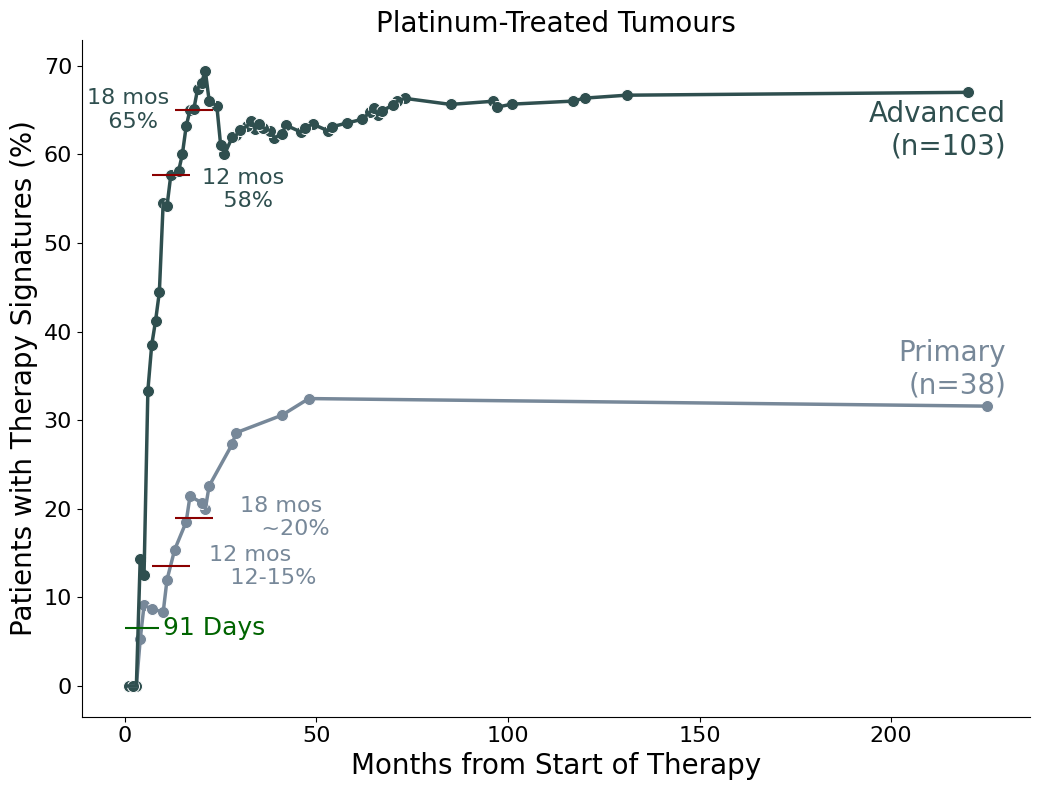

In [70]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10.5, 8))

ax1 = sns.lineplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', s=75)

ax2 = sns.lineplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

ax.set_xlabel('Months from Start of Therapy', fontsize=20)
ax.set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

ax.hlines(13.5, color='darkred', xmin=7, xmax=17)
ax.hlines(19, color='darkred', xmin=13, xmax=23)
ax1.text(22, 13.5, '12 mos\n   12-15%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 19, '18 mos\n   ~20%', va='center', color='lightslategrey', fontsize=16)

ax.hlines(57.6923, color='darkred', xmin=7, xmax=17)
ax.hlines(65, color='darkred', xmin=13, xmax=23)
ax.text(20, 56, '12 mos\n   58%', va='center', color='darkslategrey', fontsize=16)
ax.text(-10, 65, '18 mos\n   65%', va='center', color='darkslategrey', fontsize=16)

ax.text(230, 60, 'Advanced\n(n=103)', ha='right', color='darkslategrey', fontsize=20)
ax.text(230, 33, 'Primary\n(n=38)', ha='right', color='lightslategrey', fontsize=20)

ax.set_title('Platinum-Treated Tumours', fontsize=20)


ax.hlines(6.5, color='darkgreen', xmin=0, xmax=9)
ax.text(10, 6.5, '91 Days', va='center', color='darkgreen', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc.pdf'), bbox_inches="tight")

-----------
## Supplementary Figure 8

In [71]:
months_mtp_sigs_df.Patients_Percent = months_mtp_sigs_df.Patients_Percent * 100
months_mtn_sigs_df.Patients_Percent = months_mtn_sigs_df.Patients_Percent * 100

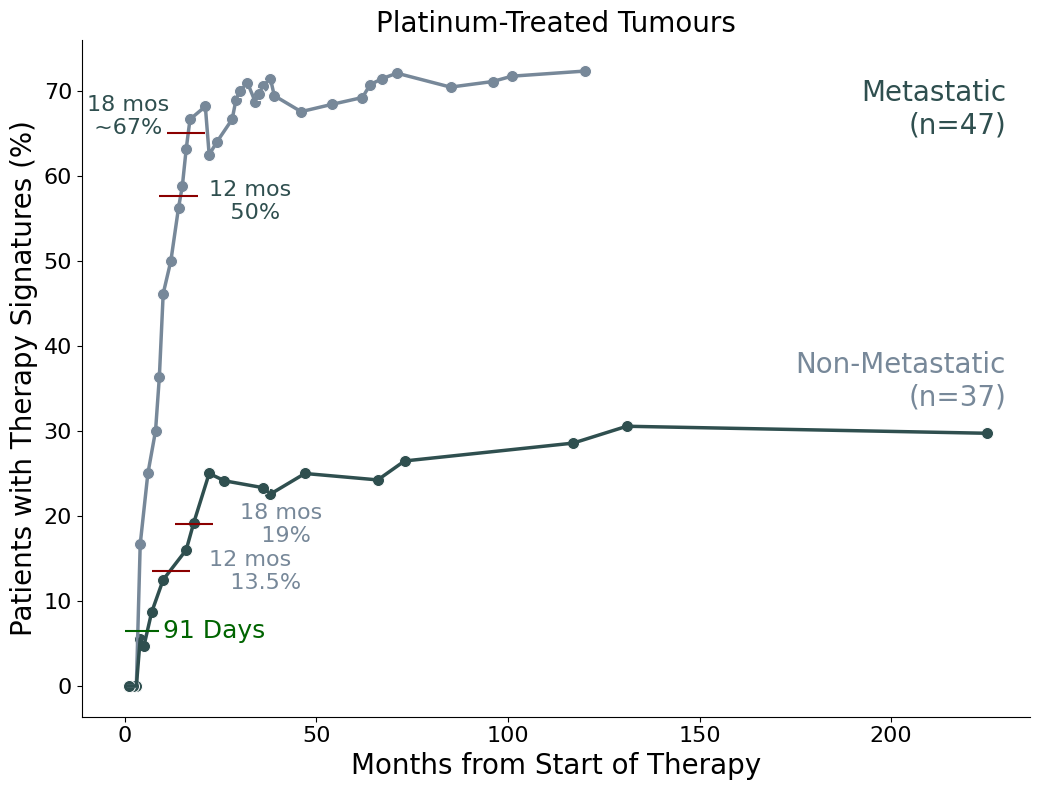

In [72]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10.5, 8))

ax1 = sns.lineplot(data=months_mtp_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_mtp_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', s=75)

ax2 = sns.lineplot(data=months_mtn_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_mtn_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

ax.set_xlabel('Months from Start of Therapy', fontsize=20)
ax.set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

ax.hlines(13.5, color='darkred', xmin=7, xmax=17)
ax.hlines(19, color='darkred', xmin=13, xmax=23)
ax1.text(22, 13.5, '12 mos\n   13.5%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 19, '18 mos\n   19%', va='center', color='lightslategrey', fontsize=16)

ax.hlines(57.6923, color='darkred', xmin=9, xmax=19)
ax.hlines(65, color='darkred', xmin=11, xmax=21)
ax.text(22, 57, '12 mos\n   50%', va='center', color='darkslategrey', fontsize=16)
ax.text(-10, 67, '18 mos\n ~67%', va='center', color='darkslategrey', fontsize=16)

ax.text(230, 65, 'Metastatic\n(n=47)', ha='right', color='darkslategrey', fontsize=20)
ax.text(230, 33, 'Non-Metastatic\n(n=37)', ha='right', color='lightslategrey', fontsize=20)

ax.set_title('Platinum-Treated Tumours', fontsize=20)


ax.hlines(6.5, color='darkgreen', xmin=0, xmax=9)
ax.text(10, 6.5, '91 Days', va='center', color='darkgreen', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.savefig(os.path.join(fig_out, 'SuppFig_8_rev.pdf'), bbox_inches="tight")